# Project 2(a)

### 0. Import Libraries

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import pickle
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from tensorflow.keras import Input, Model
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam

### 1. Read Data

0


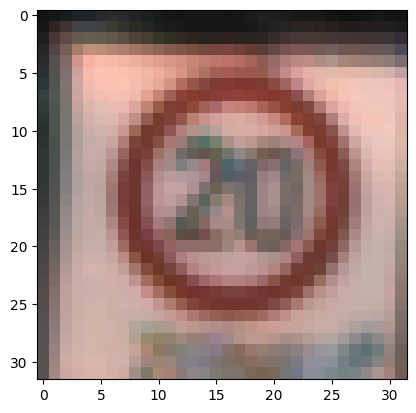

In [9]:
input_file = 'train.p'

with open(input_file, mode='rb') as f:
    data = pickle.load(f)
    
X_data, y_data = data['features'], data['labels']
plt.imshow(X_data[100])
print(y_data[100])

### 2. Data Preprocessing and Train_Test_Split

In [10]:
#use Train_test_split to split the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X_data,y_data,test_size=0.2,random_state=0)

In [11]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=43)
Y_test = to_categorical(Y_test, num_classes=43)
X_train.shape

(31367, 32, 32, 3)

### 3. Build a CNN model

In [12]:
def CreateModel(input_shape=(32, 32, 3)):  # Adjust input_shape for your data
    model = Sequential([
        # First Conv Block
        Input(shape=input_shape),
        Conv2D(filters=64, kernel_size=(5,5), activation='relu',  padding='same'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(rate=0.25),
        
        # Second Conv Block
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(rate=0.25),
        
        # Classifier Head
        Flatten(),
        Dense(units=256, activation='relu'),  # Added activation
        Dropout(0.5),
        Dense(units=43, activation='softmax')
    ])
    
    model.summary()
    return model

#### Compilation of the model

In [13]:
# Compile the model
model = CreateModel()
model.compile(
    optimizer=Adam(learning_rate=0.001),  # You can adjust learning rate
    loss='categorical_crossentropy',     # For multi-class classification
    metrics=['accuracy']
)
#...................#

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 568,171 (2.17 MB)

 Trainable params: 568,171 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
epochs = 20
history = model.fit(X_train, Y_train, batch_size=32, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.1165 - loss: 3.4448 - val_accuracy: 0.3799 - val_loss: 2.0880
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.4070 - loss: 1.8921 - val_accuracy: 0.6340 - val_loss: 1.1843
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5735 - loss: 1.3304 - val_accuracy: 0.8264 - val_loss: 0.5819
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6898 - loss: 0.9680 - val_accuracy: 0.8823 - val_loss: 0.4033
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7592 - loss: 0.7545 - val_accuracy: 0.9258 - val_loss: 0.2657
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7966 - loss: 0.6518 - val_accuracy: 0.9350 - val_loss: 0.2231
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8217 - loss: 0.5699 - val_accuracy: 0.9455 - val_loss: 0.1921
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8334 - loss: 0.5241 - 

#### Plotting graphs for accuracy

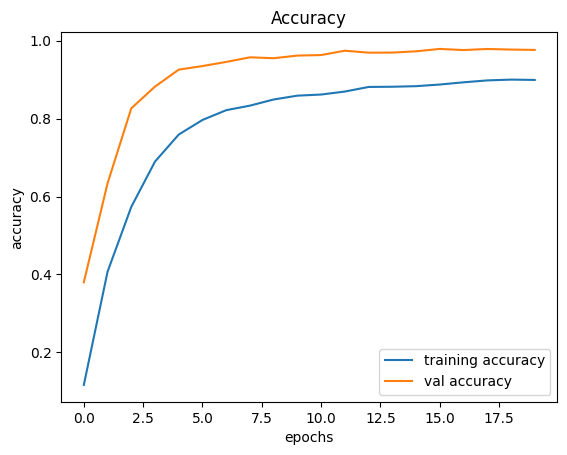

In [15]:
# Accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

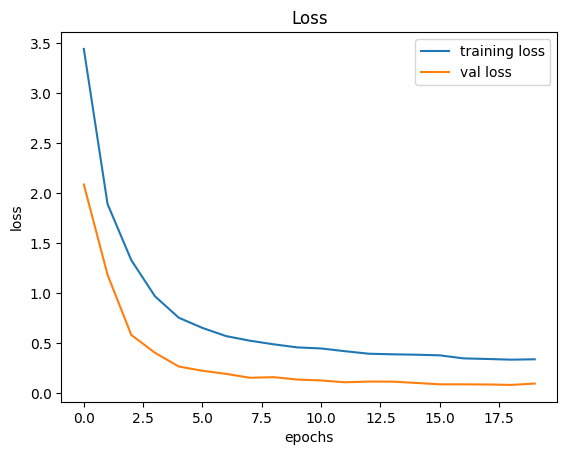

In [16]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Save the model


In [17]:
model.save("traffic_classifier_2a.h5")